In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_v6.yaml",
                                 #max_files =10
                                 #max_files =1
                                )
                                
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", 
            "baseNoLj_A_ee_matched_lj",
            "baseNoLj_A_mumu_matched_lj",
            "baseNoLj_A_mumu_matched_lj_highPT_lowLxyA",
            "baseNoLj_A_mumu_highPtA_lowLxyA",
            "baseNoLj_A_ee_highPtA_lowLxyA",
            "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
            
            
            #"base",
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"],
    #lj_reco_choices=["0.4"],
    #llpnanoaod=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [12]:
ch1 = "baseNoLj"
ch2 = "baseNoLj_A_mumu_matched_lj"
ch3 = "baseNoLj_A_ee_matched_lj"
ch4 = "baseNoLj_A_mumu_matched_lj_highPT_lowLxyA"
ch5 = "baseNoLj_A_mumu_highPtA_lowLxyA"
ch6 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch7 = "baseNoLj_A_ee_highPtA_lowLxyA"


In [13]:
def plot_ratio_set(sample):
    hists = output["out"][sample]["hists"]
    utilities.plot_ratio (hists["genAs_toMu_pt_highRange"][ch2, :],
           hists["genAs_toMu_pt_highRange"][ch1, :], 
          legend = [ch2, ch1])
    utilities.plot_ratio (hists["genAs_toMu_lxy"][ch2, :],
           hists["genAs_toMu_lxy"][ch1, :], 
          legend = [ch2, ch1])
    utilities.plot_ratio (hists["genMu_genMu_dR_lowRange"][ch2, ::2j],
           hists["genMu_genMu_dR_lowRange"][ch1, ::2j], 
          legend = [ch2, ch1])
    utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch3, :],
           hists["genAs_toE_pt_highRange"][ch1, :], 
          legend = [ch3, ch1])
    utilities.plot_ratio (hists["genAs_toE_lxy"][ch3, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch3, ch1])
    utilities.plot_ratio (hists["genE_genE_dR_lowRange"][ch3, ::2j],
           hists["genE_genE_dR_lowRange"][ch1, ::2j], 
          legend = [ch3, ch1])
    
def plot_ratio_set_with_cut(sample):
    hists = output["out"][sample]["hists"]
    utilities.plot_ratio (hists["genAs_toMu_pt_highRange"][ch4, :],
           hists["genAs_toMu_pt_highRange"][ch5, :], 
          legend = [ch4, ch5])
    utilities.plot_ratio (hists["genAs_toMu_lxy"][ch2, :],
           hists["genAs_toMu_lxy"][ch1, :], 
          legend = [ch4, ch5])
    utilities.plot_ratio (hists["genMu_genMu_dR_lowRange"][ch4, ::2j],
           hists["genMu_genMu_dR_lowRange"][ch5, ::2j], 
          legend = [ch4, ch5])
    utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch6, :],
           hists["genAs_toE_pt_highRange"][ch7, :], 
          legend = [ch6, ch7])
    utilities.plot_ratio (hists["genAs_toE_lxy"][ch6, :],
           hists["genAs_toE_lxy"][ch7, :], 
          legend = [ch6, ch7])
    utilities.plot_ratio (hists["genE_genE_dR_lowRange"][ch6, ::2j],
           hists["genE_genE_dR_lowRange"][ch7, ::2j], 
          legend = [ch6, ch7])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


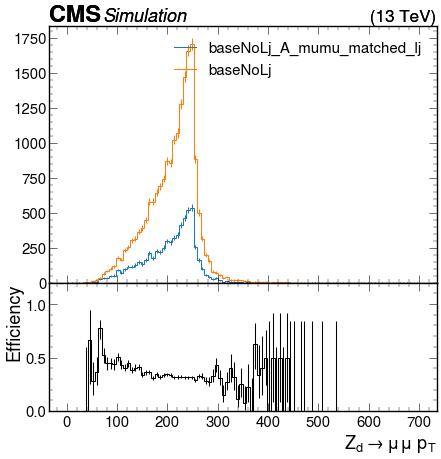

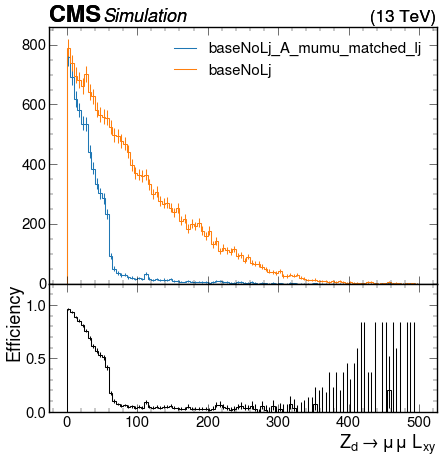

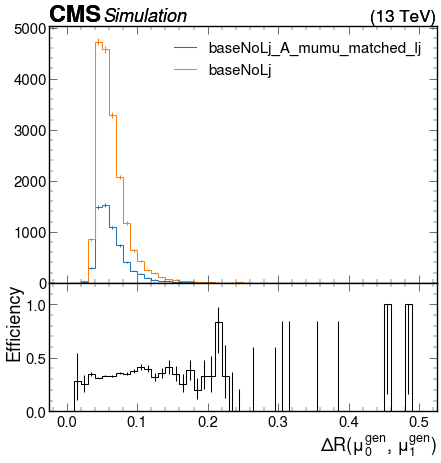

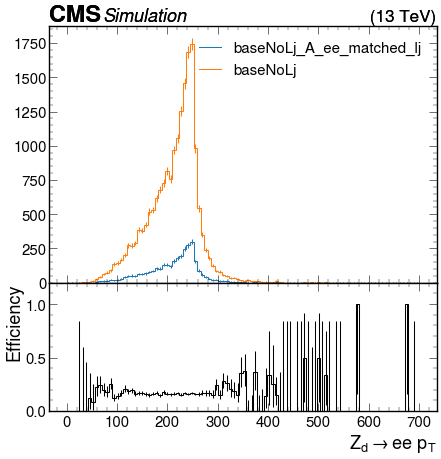

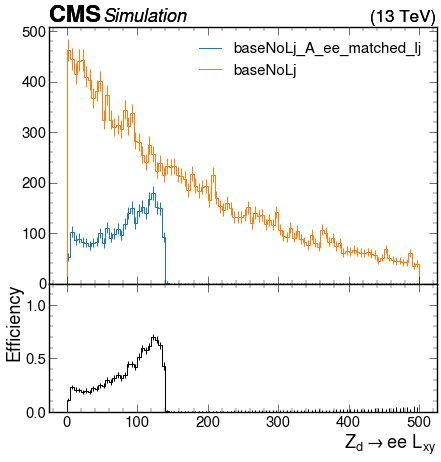

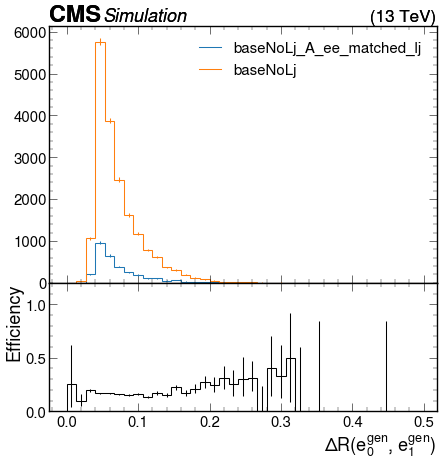

In [10]:
plot_ratio_set("2Mu2E_500GeV_5p0GeV_80p0mm")

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


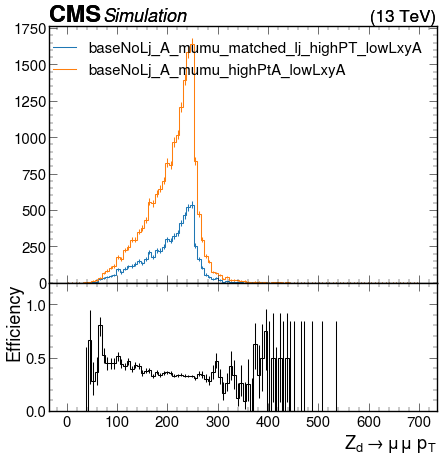

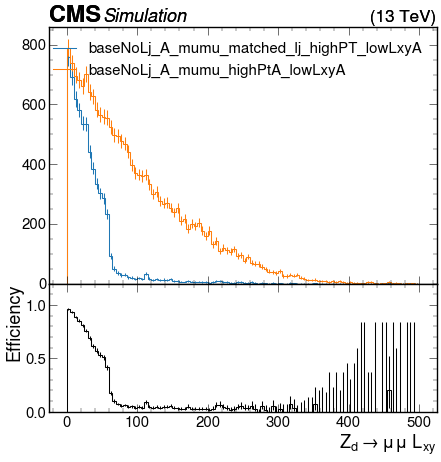

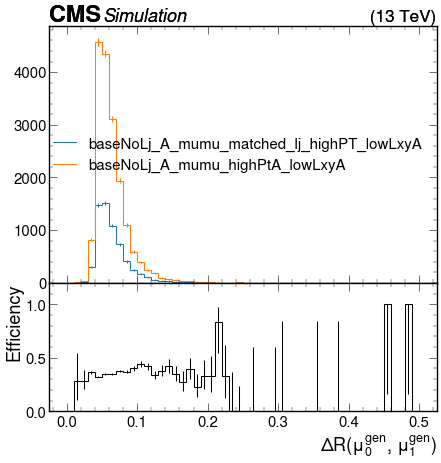

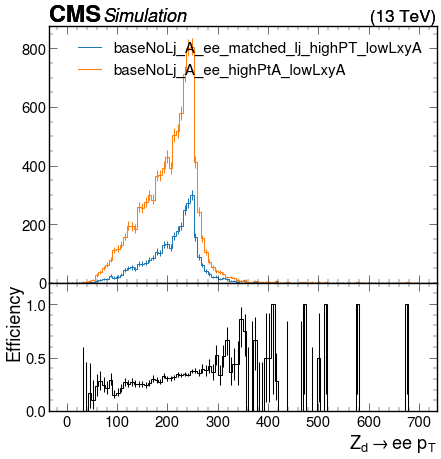

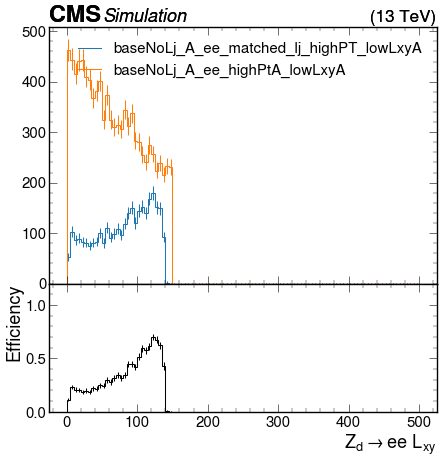

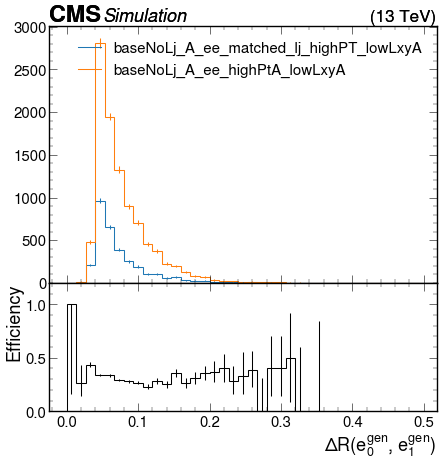

In [15]:
plot_ratio_set_with_cut("2Mu2E_500GeV_5p0GeV_80p0mm")

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


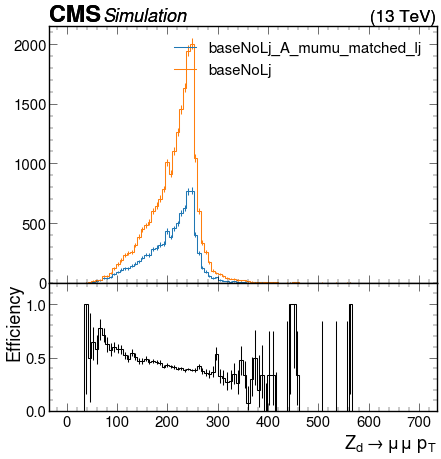

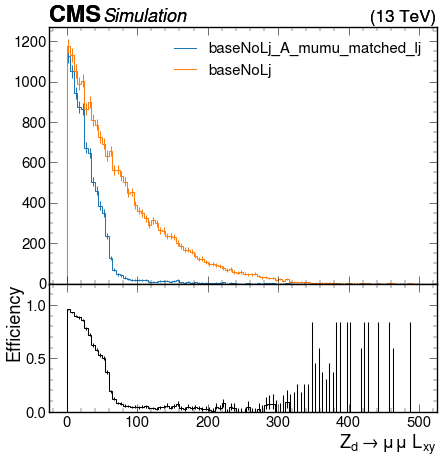

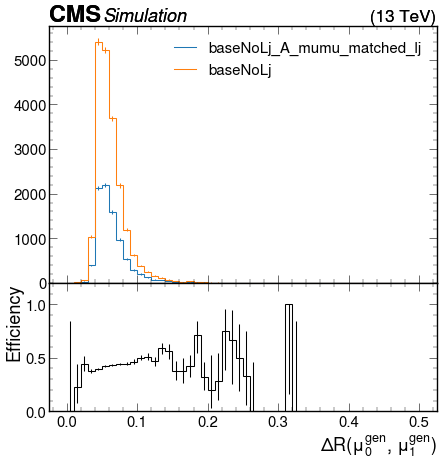

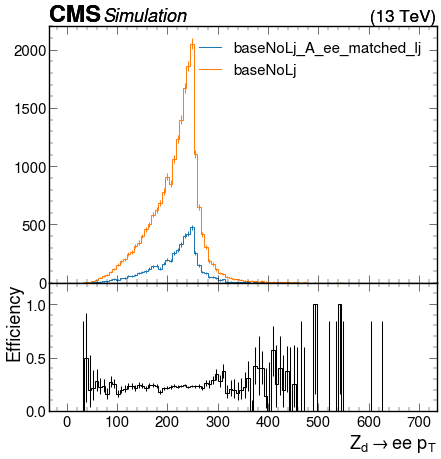

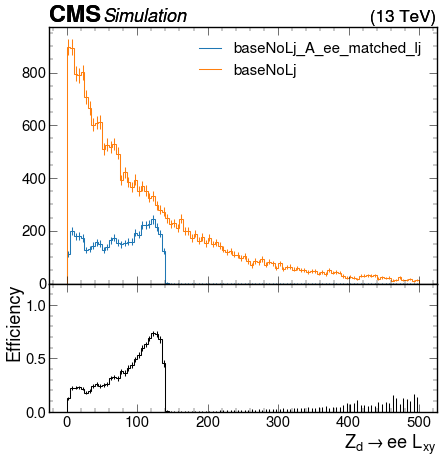

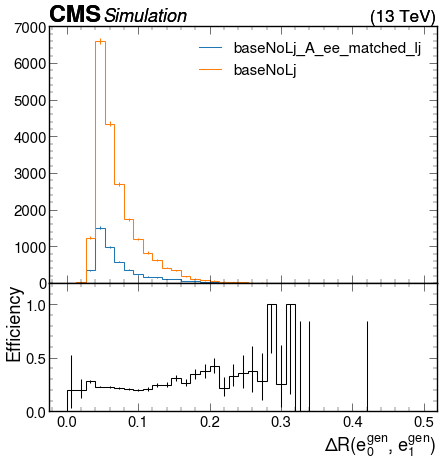

In [9]:
plot_ratio_set("2Mu2E_500GeV_5p0GeV_40p0mm")

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


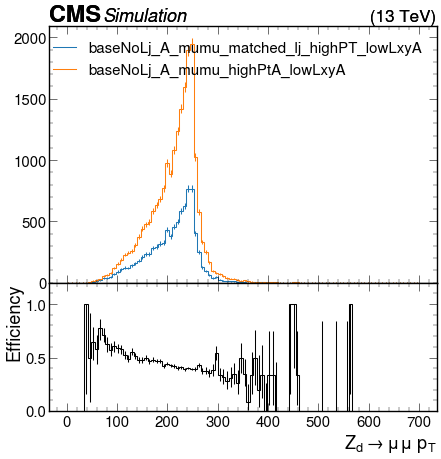

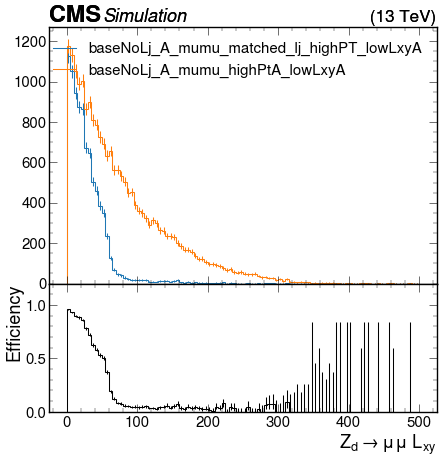

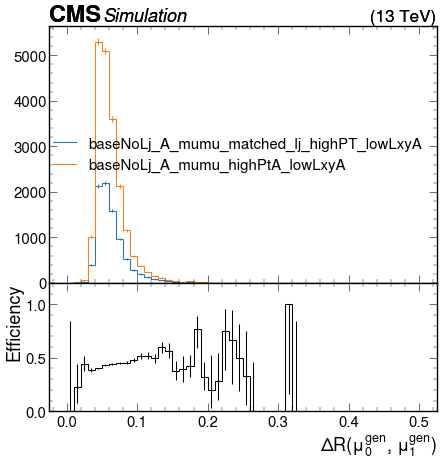

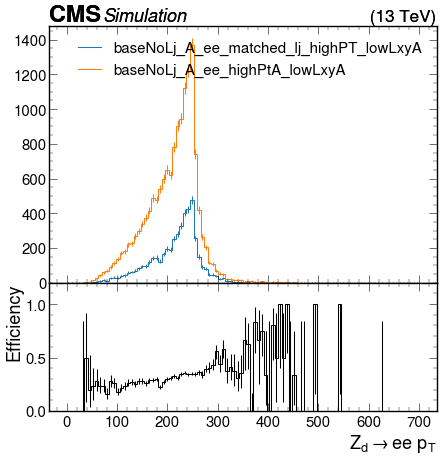

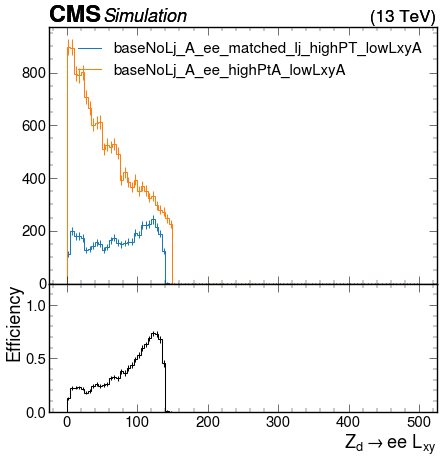

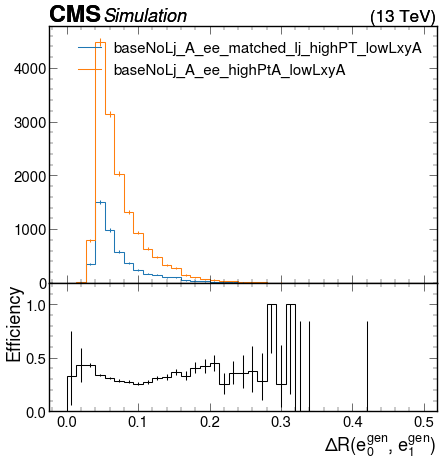

In [16]:
plot_ratio_set_with_cut("2Mu2E_500GeV_5p0GeV_40p0mm")

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


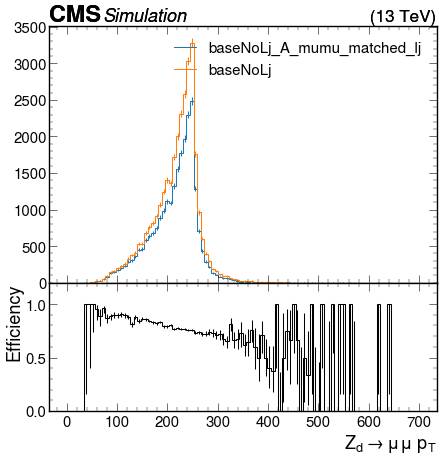

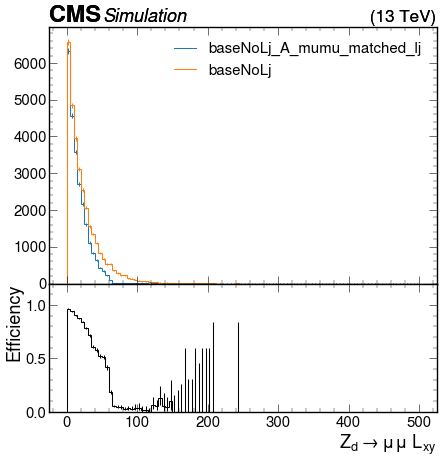

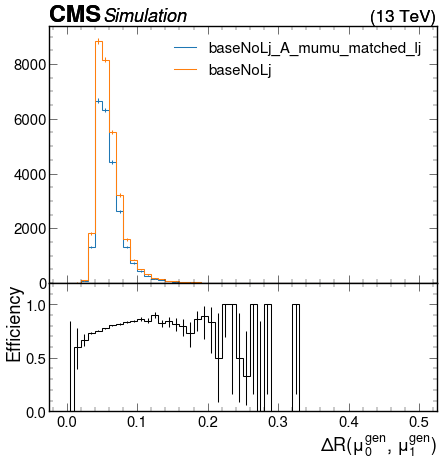

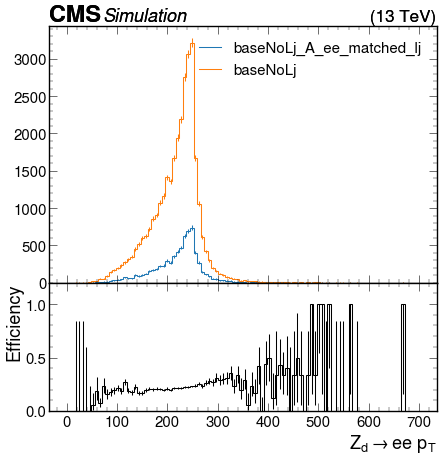

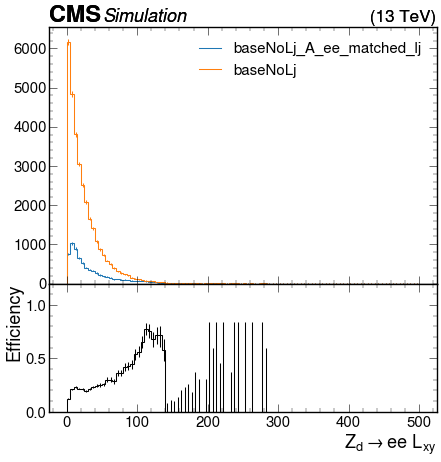

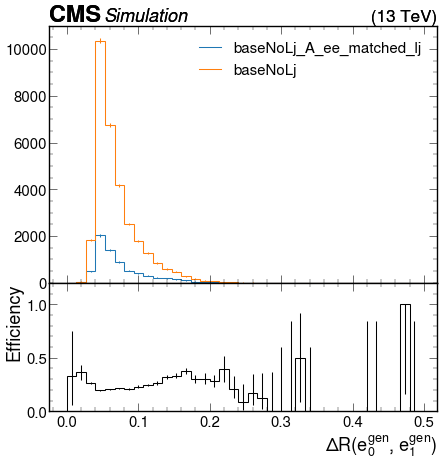

In [6]:
plot_ratio_set("2Mu2E_500GeV_5p0GeV_8p0mm")

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


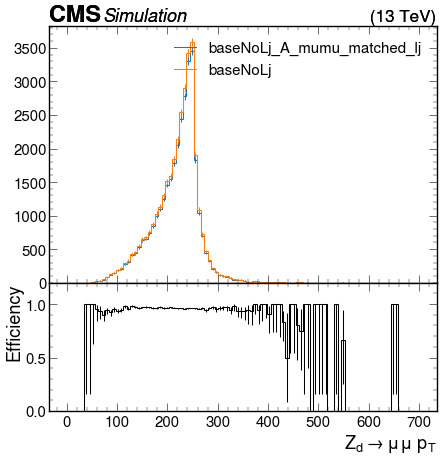

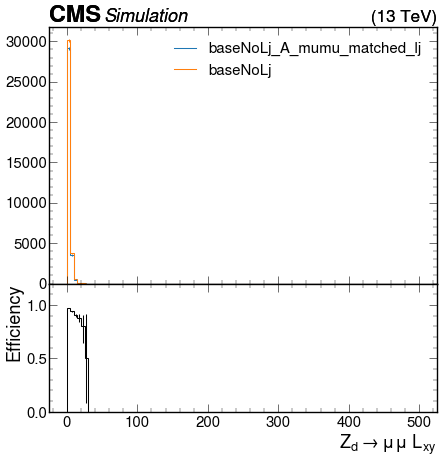

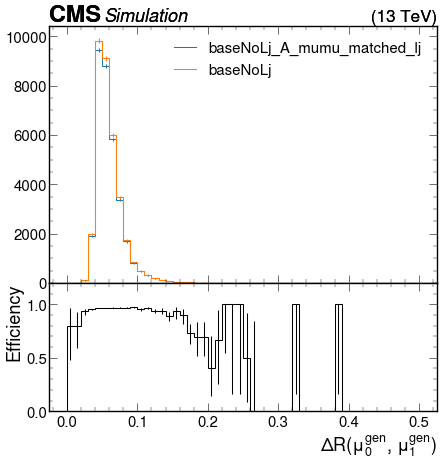

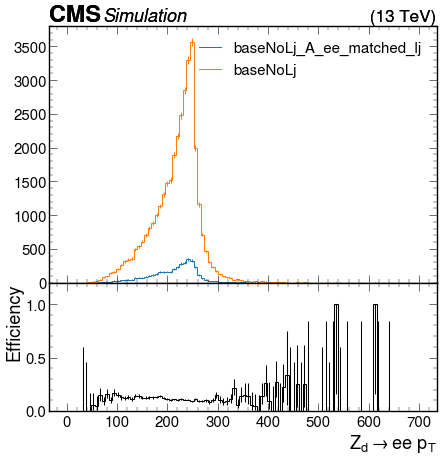

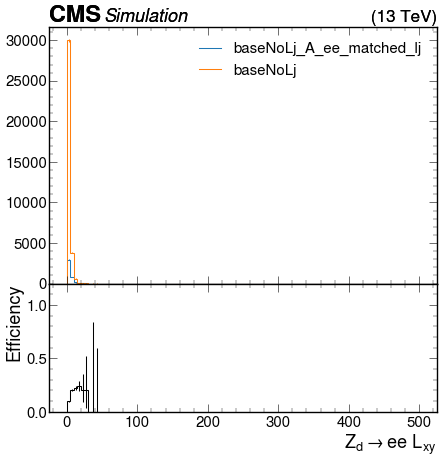

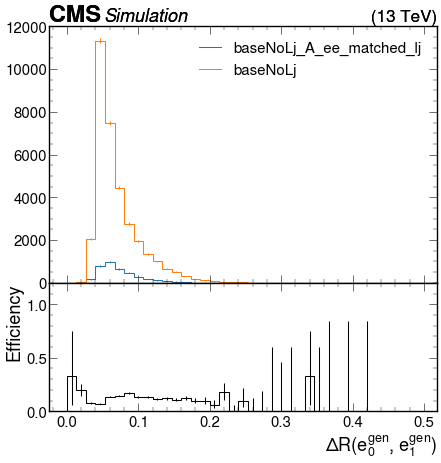

In [5]:
plot_ratio_set("2Mu2E_500GeV_5p0GeV_0p8mm")

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:132: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


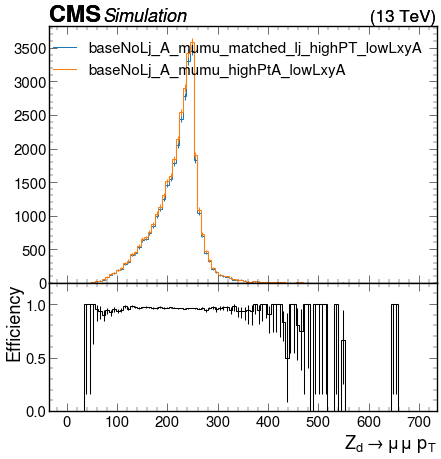

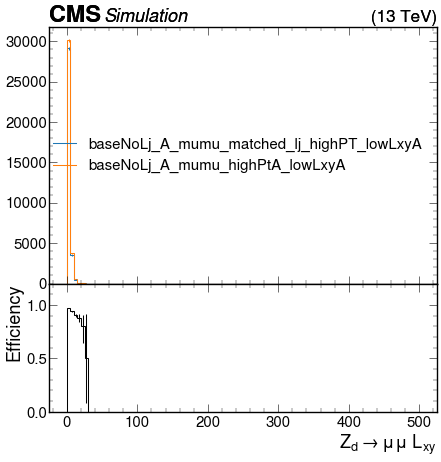

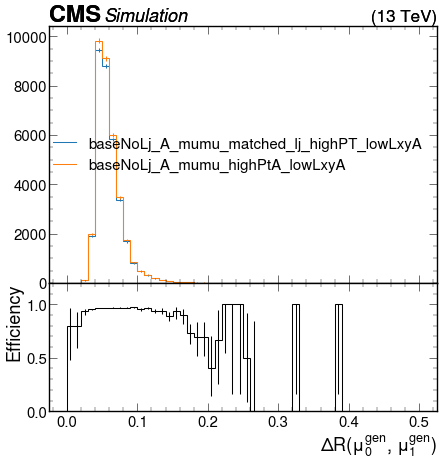

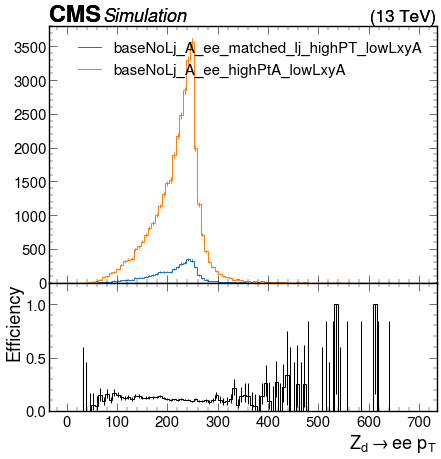

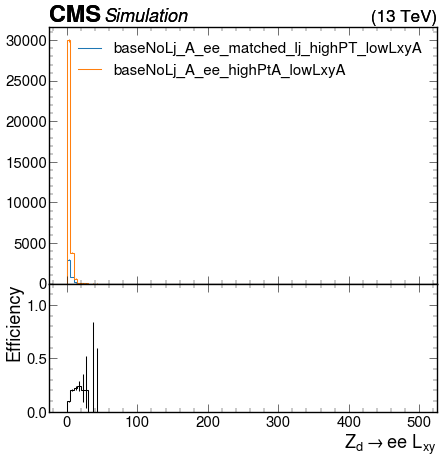

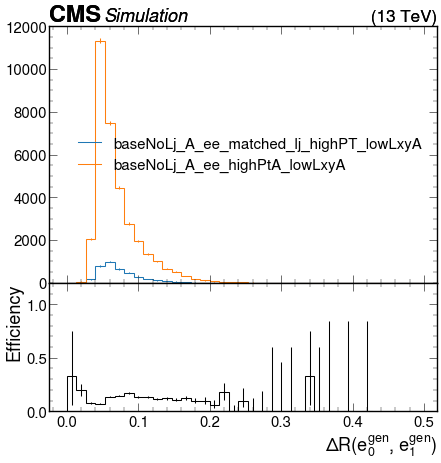

In [17]:
plot_ratio_set_with_cut("2Mu2E_500GeV_5p0GeV_0p8mm")

In [14]:

print("2Mu2E_500GeV_5p0GeV_80p0mm")
cutflow = output["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["cutflow"]
cutflow[ch1].print_table(unweighted = False)
cutflow[ch2].print_table(unweighted = False)
cutflow[ch3].print_table(unweighted = False)
cutflow[ch4].print_table(unweighted = False)
cutflow[ch5].print_table(unweighted = False)
cutflow[ch6].print_table(unweighted = False)
cutflow[ch7].print_table(unweighted = False)
print("2Mu2E_500GeV_5p0GeV_40p0mm")
cutflow = output["out"]["2Mu2E_500GeV_5p0GeV_40p0mm"]["cutflow"]
cutflow[ch1].print_table(unweighted = False)
cutflow[ch2].print_table(unweighted = False)
cutflow[ch3].print_table(unweighted = False)
print("2Mu2E_500GeV_5p0GeV_8p0mm")
cutflow = output["out"]["2Mu2E_500GeV_5p0GeV_8p0mm"]["cutflow"]
cutflow[ch1].print_table(unweighted = False)
cutflow[ch2].print_table(unweighted = False)
cutflow[ch3].print_table(unweighted = False)
print("2Mu2E_500GeV_5p0GeV_0p8mm")
cutflow = output["out"]["2Mu2E_500GeV_5p0GeV_0p8mm"]["cutflow"]
cutflow[ch1].print_table(unweighted = False)
cutflow[ch2].print_table(unweighted = False)
cutflow[ch3].print_table(unweighted = False)




2Mu2E_500GeV_5p0GeV_80p0mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              82029.0      82029.0
pass triggers             18931.0      18931.0
PV filter                 81416.0      18731.0
cut name                   individual cut N    all cut N
-----------------------  ------------------  -----------
No selection                        82029.0      82029.0
pass triggers                       18931.0      18931.0
PV filter                           81416.0      18731.0
genAs_toMu_matched_muLj             15230.0       6280.0
cut name                   individual cut N    all cut N
-----------------------  ------------------  -----------
No selection                        82029.0      82029.0
pass triggers                       18931.0      18931.0
PV filter                           81416.0      18731.0
genAs_toE_matched_egmLj             13978.0       3119.0
cut name                   individual cut N    all cut

NameError: name 'hists' is not defined

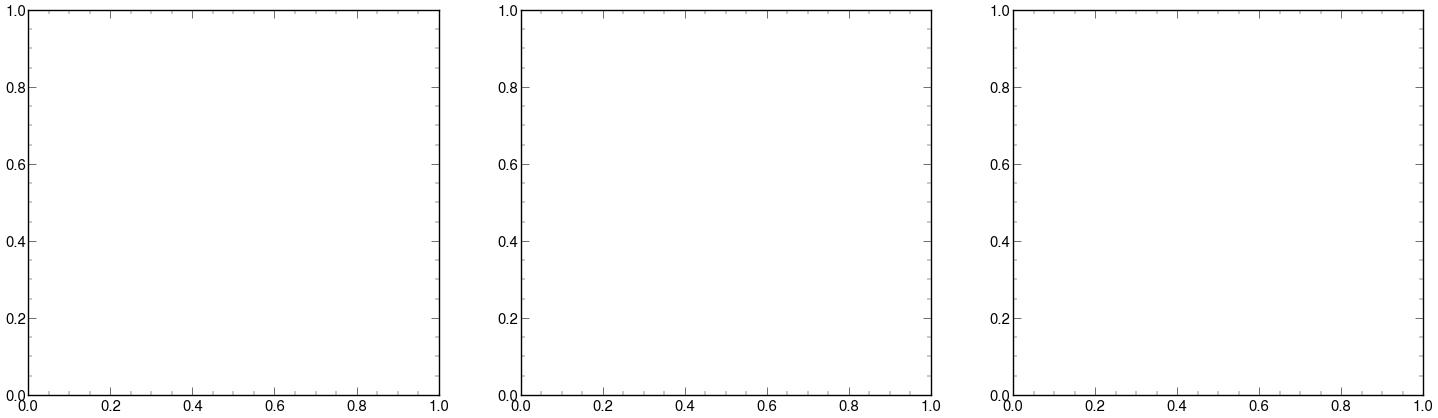

In [8]:
histograms = [
              ["genAs_toE_lxy_EEdR_XXLowRange",
              "genAs_toE_pt_EEdR_XXLowRange",
              "genAs_toE_lxy_pt_lowRange"
              ],
              ["genAs_toE_lxy_EEdR_XLowRange",
              "genAs_toE_pt_EEdR_XLowRange",
              "genAs_toE_lxy_pt_lowRange"
              ],
              ["genAs_toE_lxy_EEdR",
              "genAs_toE_pt_EEdR_lowRange",
              "genAs_toE_pt_lxy"
              ]
]
              
row = len(samples)
column = len(histograms)


for s in range(row):
    fig , ax = plt.subplots(1, column, figsize =(column*12, 10)) 
    for h in range(column):
        plt.subplot(1, column, h+1)
        num = hists[histograms[2][h]][ch2, ::2j, ::2j]
        den = hists[histograms[2][h]][ch1, ::2j, ::2j]
        effi, errors = utilities.get_eff_hist(num, den)
        utilities.plot(effi)